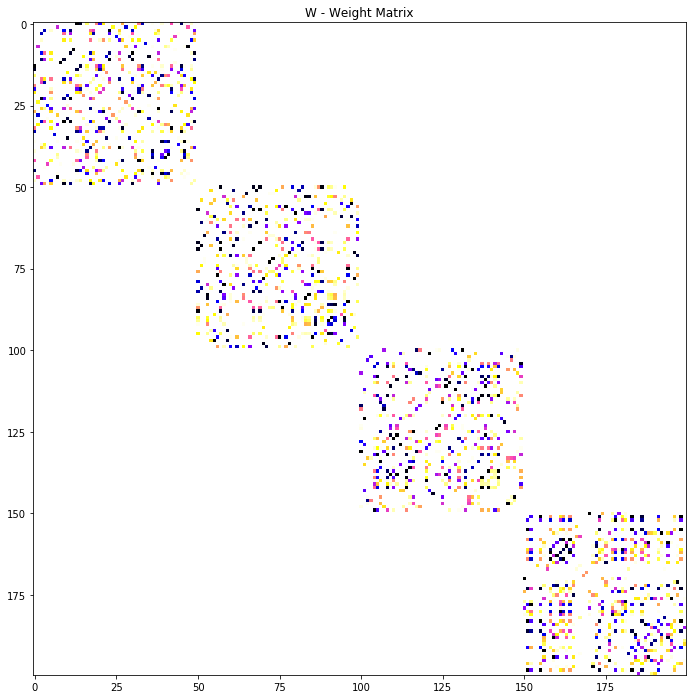

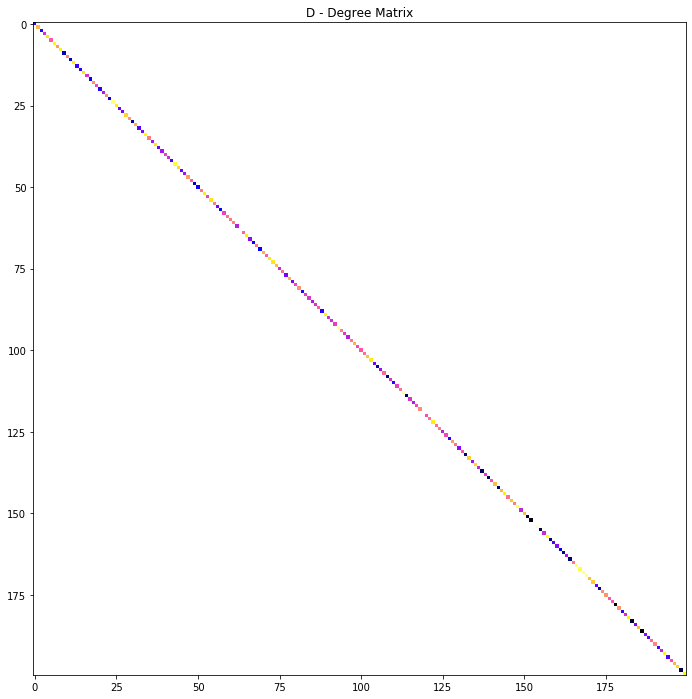

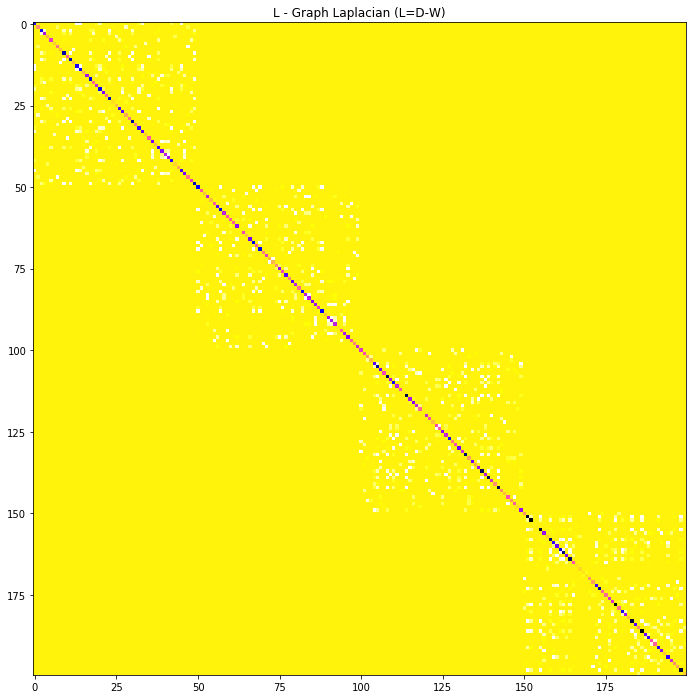

Output of KMeans Clustering


array([[-9.91173396e-02, -8.76031580e-03, -5.55111512e-17,
         9.81840679e-03],
       [ 6.93889390e-18,  2.77555756e-17, -1.41421356e-01,
         0.00000000e+00],
       [ 1.25771523e-02, -1.42302419e-01, -2.77555756e-17,
        -2.55880095e-08],
       [-9.91173342e-02, -8.76013258e-03,  0.00000000e+00,
        -9.81840698e-01]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

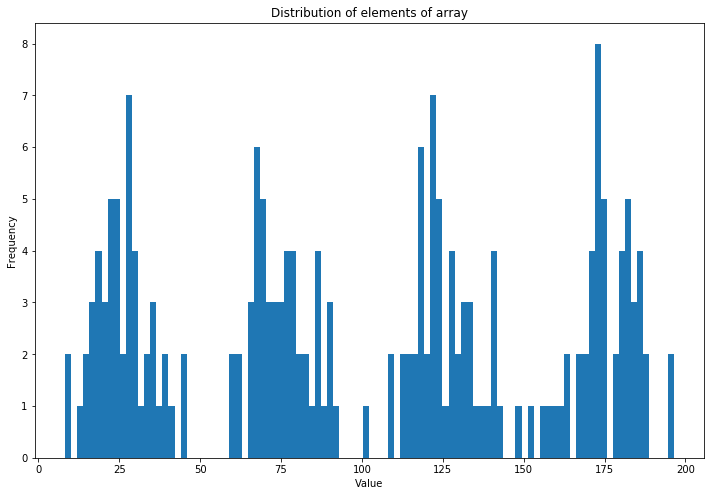

Cluster counts and Ranges:


,Label,count,min,max
1,1,50,8.265074,44.537283
2,2,49,59.464690,92.867391
3,3,1,101.943942,101.943942
0,0,100,108.444653,196.371115


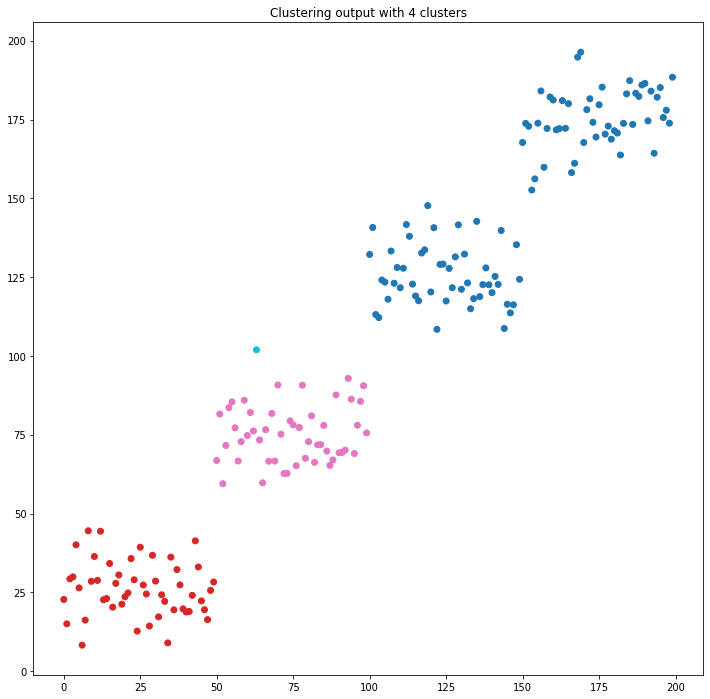

In [8]:
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import spectral_clustering_helper as scplot
import pandas as pd

########################
#       Parameters     #
########################

k=4 #Number of clusters (segments of graphs to create)
dist_centers = [25,75,125,175]
dist_sd = 10
dist_cnt = 50



########################
#       Setup etc      #
########################

#Functions 
def similarity(x,y):
    return sp.exp((-(x-y)**2)/2)

#Initialize Graph Vertices and construct L,D and W
x_list = sp.concatenate([sp.random.normal(c,dist_sd,dist_cnt) for c in dist_centers])

L,W,D = scplot.createMatrices(x_list, similarity)


#Plot L,D and W
scplot.plot_matrix(W, "W - Weight Matrix")
scplot.plot_matrix(D,"D - Degree Matrix")
scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")



########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L)

U = e_vec[:,0:k]

T=U.copy()
for i in range(T.shape[1]):
    T[:,i] = T[:,i]/np.linalg.norm(T[:,i])
        
km = KMeans(n_clusters=k).fit(T)

# plot output
print("Output of KMeans Clustering")
display(km.cluster_centers_)
display(km.labels_)


########################
#       Outputs        #
########################

data_cluster = pd.DataFrame({'Data':x_list, 'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').Data.agg(['count','min','max']).reset_index()
data_cluster_result.sort_values('min', inplace=True)

scplot.plot_histo(x_list)

print("Cluster counts and Ranges:")
display(data_cluster_result)
    
scplot.plot_clusters(x_list,km.labels_,"Clustering output with "+str(k)+" clusters")




Interesting observation:

This is also affected by the number of eigen vectors used for clustering, the effects are similar to un-normalized version